In [25]:
import glob

import matplotlib.pyplot as plt
import numpy as np
from persim import plot_diagrams

In [26]:
from astropology.series import pd_time_series
from astropology.distance import wasserstein_distance, bottleneck_distance

In [27]:
# directories
work = "/home/edgar/astropology/"
data = f"{work}/data/spectra"

In [28]:
f_names = glob.glob(f"{data}/*.npy")
f_names.remove(f"{data}/wave.npy")

In [29]:
n_fluxes = np.load(f_names[0]).size
n_spectra = len(f_names)

spectra = np.empty((n_spectra, n_fluxes))

for idx, file in enumerate(f_names):

    spectra[idx, :] = np.load(file)

wave = np.load(f"{data}/wave.npy")

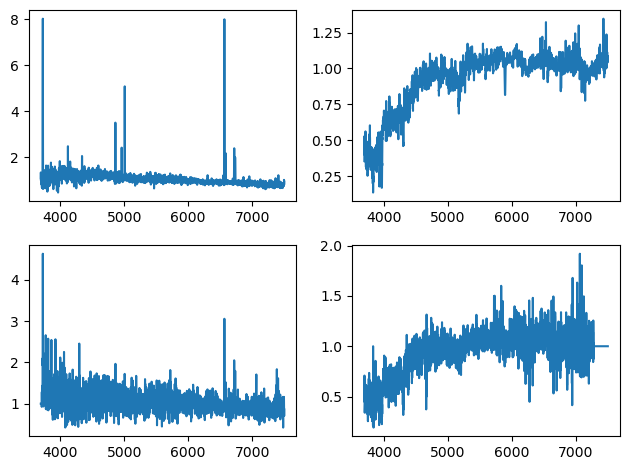

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=2, tight_layout=True)

for idx, ax in enumerate(np.ravel(axs)):

    ax.plot(wave, spectra[idx])

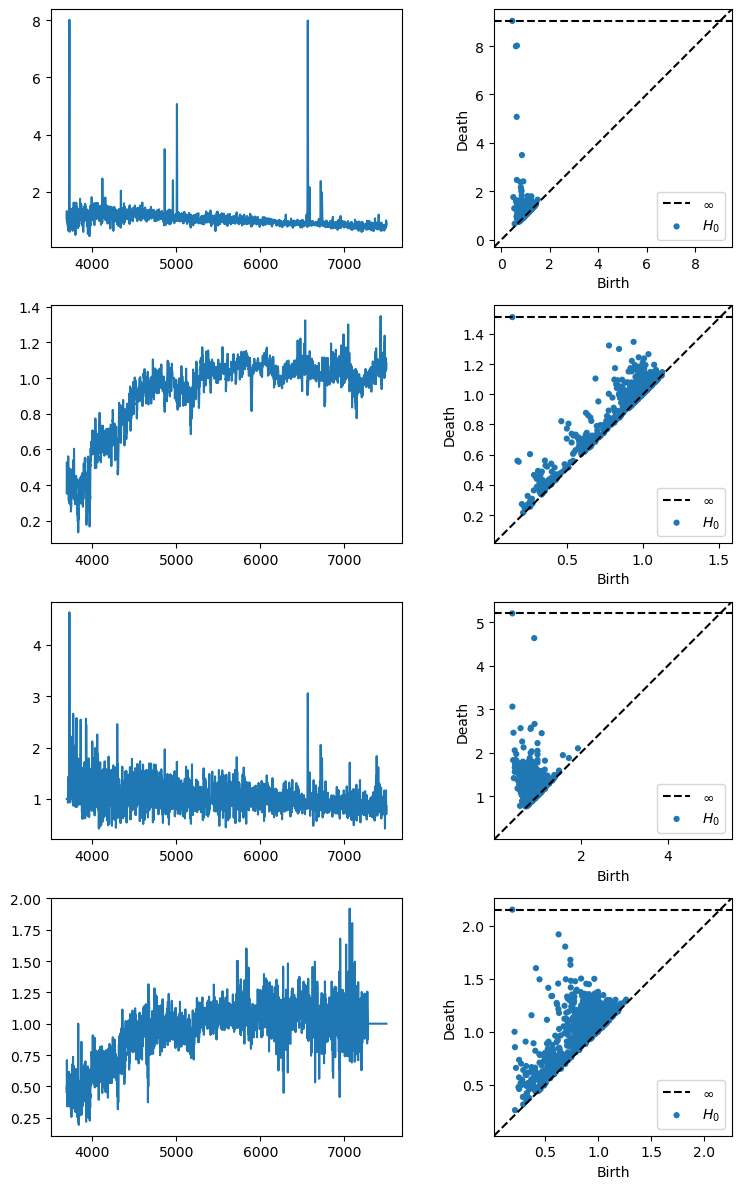

In [31]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 12), tight_layout=True)

for idx, spectrum in enumerate(spectra):
    axs[idx, 0].plot(wave, spectrum)
    pdgm = pd_time_series(spectrum)
    plot_diagrams(pdgm, ax=axs[idx, 1])

### What if we filter noise?

In [32]:
from astropy.convolution import Gaussian1DKernel, convolve
def gaussian_filter(
    spectrum: np.array, kernel_size: int = 3
) -> tuple[np.array, np.array]:
    """
    Filter noise on a spectrum with a gaussian kernel

    INPUT

    kernel_size: number of elements in gaussian kernel

    OUTPUT

    filtered_spectrum, noise:
        filtered_spectrum: spectrum with noise removed
        noise: spectrum's noise
    """
    kernel = Gaussian1DKernel(kernel_size)

    #spectrum = self.spectrum[0, :, 0]
    #filtered_spectrum = convolve(spectrum, kernel, boundary="extend")
    filtered_spectrum = convolve(spectrum, kernel, boundary="extend")

    noise = spectrum - filtered_spectrum

    #filtered_spectrum = gray2rgb(filtered_spectrum.reshape(1, -1))
    #noise = gray2rgb(noise.reshape(1, -1))

    return filtered_spectrum, noise


Shape of diagrams:
spectrum: (858, 2)
Filtered spectrum: (222, 2)


(0.6390200853347778, 93.46458690040132)

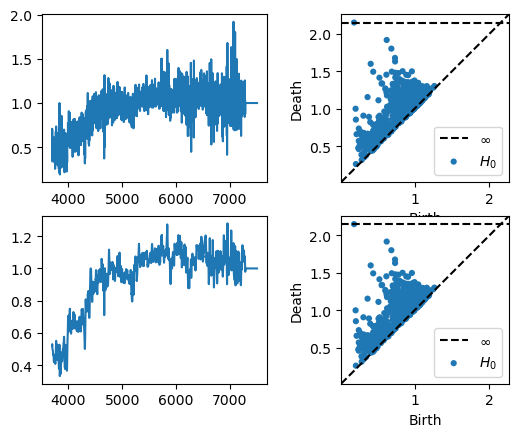

In [53]:
spectrum = spectra[3]
pdgm = pd_time_series(spectrum)
f_spectrum, _ = gaussian_filter(spectrum)
f_pdgm = pd_time_series(f_spectrum)

print("Shape of diagrams:")
print(f"spectrum: {pdgm.shape}")
print(f"Filtered spectrum: {f_pdgm.shape}")

fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].plot(wave, spectrum)
plot_diagrams(pdgm, ax=axs[0, 1])

axs[1, 0].plot(wave, f_spectrum)
plot_diagrams(pdgm, ax=axs[1, 1])

bd = bottleneck_distance(pdgm, f_pdgm)
wd = wasserstein_distance(pdgm, f_pdgm)
bd, wd